In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt

from itertools import combinations

In [59]:
data = np.load('/home/jan/lbc_full.npy')
meta = pd.read_csv('/mnt/tchandra-lab/Jan/methyl-pattern/data/lbc/meta.csv')
lbc_fitness = pd.read_csv('Datasets/fitness_table.csv', index_col='id')

In [3]:
# Pre-allocate the memory for meth_gradients
counter = 0
for part_id in meta.ID.unique():
    # Extract number of waves in participant
    waves_number = len(meta[meta.ID == part_id].sort_values(by='WAVE'))

    # Use arithmetic progression formula to update #possible wave combinations
    combinations = waves_number*(waves_number-1)/2
    counter = counter + int(combinations)

# create empty numpy array, each row is a combination of methylation gradients 
gradients = np.empty((counter, data.shape[1]))

In [6]:
# Create gradients metadata dataframe
gradients_meta = pd.DataFrame()

# Track combination number to point towards a row in gradients
index_counter = 0

for part_id in meta.ID.unique():
    part_slice = meta[meta.ID == part_id].sort_values(by='WAVE')

    for comb in combinations(part_slice.WAVE, 2):
        init_index = part_slice[part_slice['WAVE']==comb[0]]['index']
        last_index = part_slice[part_slice['WAVE']==comb[1]]['index']
        gradients[index_counter, :] = (data[last_index] - data[init_index]) / (3*(comb[1]-comb[0]))

        gradients_meta = gradients_meta.append({'part_id': part_id, 
                                          'gradients_index': index_counter,
                                          'combination': comb},
                                          ignore_index=True)
        index_counter += 1

In [12]:
gradients_meta

,combination,gradients_index,part_id
0,"(1, 2)",0.0,LBC360783
1,"(1, 3)",1.0,LBC360783
2,"(1, 4)",2.0,LBC360783
3,"(2, 3)",3.0,LBC360783
4,"(2, 4)",4.0,LBC360783
...,...,...,...
3365,"(2, 3)",3365.0,LBC360628
3366,"(2, 3)",3366.0,LBC360184
3367,"(2, 3)",3367.0,LBC360265
3368,"(2, 3)",3368.0,LBC360206


In [72]:
y = np.zeros((len(gradients_meta), len(lbc_fitness.columns)))
for i, row in gradients_meta.iterrows():
    if row.part_id in lbc_fitness.index.unique():
        y[i,:] = lbc_fitness[lbc_fitness.index == row.part_id].values

In [73]:
zero_columns = np.where(~target.any(axis=1))[0]

y_filtered =  np.delete(target, zero_columns, axis=0)
X_filtered = np.delete(gradients, zero_columns, axis=0)

In [ ]:
import numpy as np
from sklearn.decomposition import NMF
model = NMF(n_components=100, init='random', random_state=0)
W = model.fit_transform(X_filtered)
H = model.components_

In [86]:
std_CpG = np.nanstd(X_filtered, axis=0)

In [77]:
box = sns.boxplot(x=std_CpG)
box

(174, 459309)

In [ ]:
a=1
a

# Check sites

In [4]:
def part_gradient(part_id):
    part_slice = meta[meta.ID == part_id].sort_values(by='WAVE')
    time_span = 3*(part_slice.WAVE.iloc[-1] - part_slice.WAVE.iloc[0])
    
    first_index = meta[meta.ID == part_id].sort_values(by='WAVE')['index'].iloc[0]
    last_index = meta[meta.ID == part_id].sort_values(by='WAVE')['index'].iloc[-1]

    gradient = (data[last_index] - data[first_index]) / time_span
    
    return gradient

def check_sites(part_id , top_sites=True, bottom=True, n_std=4):
    # Extract participant data
    part_slice = meta[meta.ID == part_id].sort_values(by='WAVE')
    part_data = data[part_slice['index'],]

    # Compute evolution of methylation between first and last timepoint
    meth_evolution = part_gradient(part_id)
    mean = np.nanmean(meth_evolution)
    std = np.nanstd(meth_evolution)

    # Find locations whit large gradients
    top_sites = np.where(meth_evolution > mean + n_std*std)[0]
    bottom_sites  = np.where(meth_evolution < mean - n_std*std)[0]    

    fig, (ax1, ax2) = plt.subplots(2, 1)

    # Plot top sites
    for site in top_sites:
        ax1.plot(part_slice['WAVE'], part_data[:,site])

    # Plot bottom sites
    for site in bottom_sites:
        ax2.plot(part_slice['WAVE'], part_data[:,site])
    
    return fig, (top_sites, bottom_sites)

Mean: -0.00021586747144305057 -- 2 Std: 0.0145054513559847


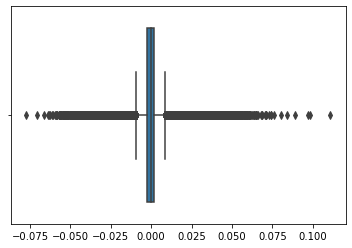

In [5]:
# Compute evolution of methylation between first and last timepoint

meth_evolution = part_gradient('LBC0001A')
mean = np.nanmean(meth_evolution)
std = np.nanstd(meth_evolution)
print(f'Mean: {mean} -- 2 Std: {2*std}')

box = sns.boxplot(x=meth_evolution)

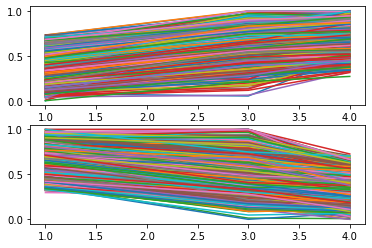

In [6]:
# Extract and plot top and bottom sites
fig, sites = check_sites('LBC0001A')

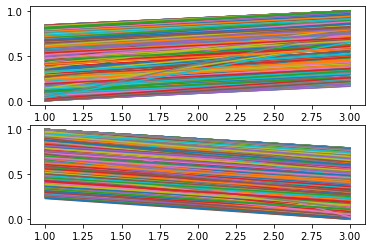

In [7]:
# Extract and plot top and bottom sites
fig_2, sites_2 = check_sites('LBC0251K')

# Predicting the presence of mutations based on the longitudinal evolution of mutations

## Preparing a dataset

In [8]:
import numpy as np
from tensorflow import keras
from keras.datasets import mnist

Using TensorFlow backend.


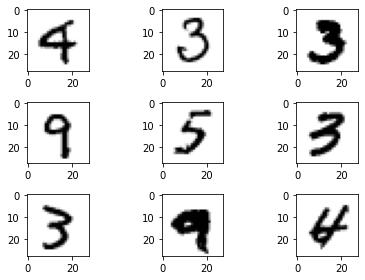

In [9]:
#loading dataset
(train_X, train_y), (val_X, val_y) = mnist.load_data()

#normalizing the dataset
train_X, val_X = train_X/255, val_X/255

# visualizing 9 rndom digits from the dataset
for i in range(331,340):
    plt.subplot(i)
    a = np.random.randint(0, train_X.shape[0], 1)
    plt.imshow(train_X[a[0]], cmap = plt.get_cmap('binary'))

plt.tight_layout()
plt.show()

In [10]:
train_X.shape

(60000, 28, 28)